In [9]:
import numpy as np
import matplotlib.pyplot as plt
final_fig_path = "../../CH_Manuscript/Figures/"
import sys
sys.path.insert(1, '../Functions')
from scipy.optimize import root
from scipy.integrate import solve_ivp
#from fitness_funs_non_dim import *
from group_w_pop_funs import get_list_of_trajectories, bounded_ivp
import equilibria_funs as eq
import sim_graph_funs as sim
from sim_graph_funs import plot_trajectory_vs_T
#from sim_graph_funs import N1lab, N2lab, Plab, mean_x_lab, Tlab
import bif_diagram_funs as bif
from local_stability_funs import fun_Jac, classify_stability
colors_x = ['k', 'b', 'r', 'm']
bif_sim_fig_path = final_fig_path + "BifurcationSimulations/"


# Simulate from Bifurcation Diagrams

Simulates the system for different regions from the bifurcation graphs

In [10]:
fn_lab_list = ['meanx', 'preys', 'g2', 'g3']

In [11]:
p = {
    "α1_of_1": 0.05,
    "α2_of_1": 0.95,
    "s1": 2,
    "s2": 2,
    "H1a": 0,
    "H1b": 0,
    "H2a": 1,
    "H2b": 1,
    "A1": 0.6,
    "A2": 0.5,
    "η1": 0.6,
    "η2": 0.2,
    "β1": 5,
    "β2": 1,
    "α2_fun_type": "sigmoid",
    "x_max": 5,
    "Tx": 0.01,
    "d": 100,
    "pop_process" :True
}

In [13]:
u0 = [0.8,0.7,0.1,0.1,0.1,0.1,.1]
out_dic = bounded_ivp(u0, params, t_f = 1000, if_dict=True)

In [22]:
out_dic['N1'][-1] - 0.23145155668072806
out_dic['N2'][-1] - 0.6824156188085729

np.float64(1.4257160586561568e-06)

In [ ]:
out_dic['g'][0][-1] - 0.19726663826834287
out_dic['g'][1][-1] - 0.04389917211215002
out_dic['g'][2][-1] - 0.6365691055633692
out_dic['g'][3][-1] - 0.1707265815889342
out_dic['g'][4][-1] - 0.1707265815889342

np.float64(8.002902128767531e-07)

generating initial points


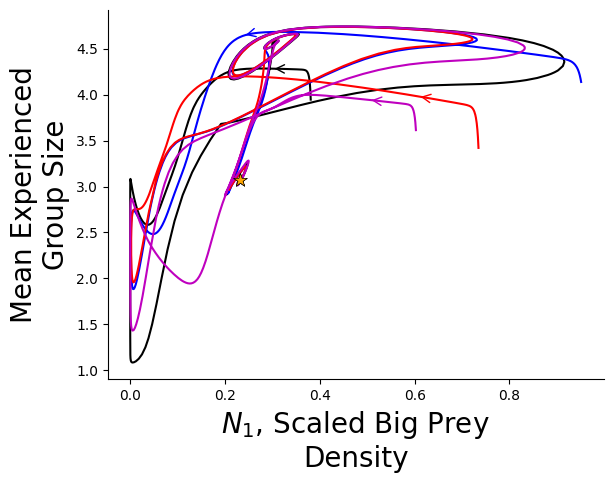

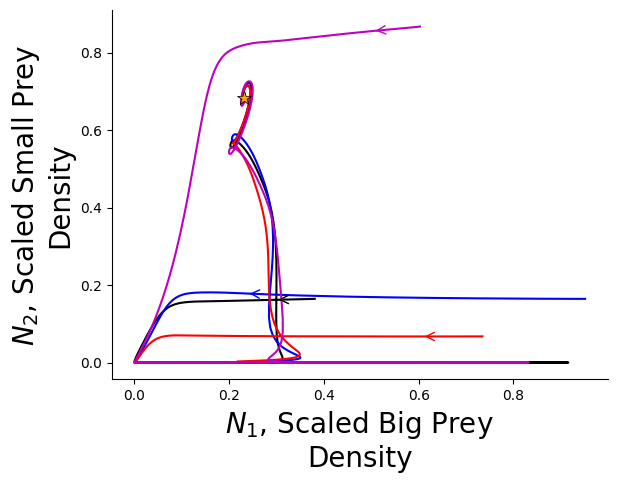

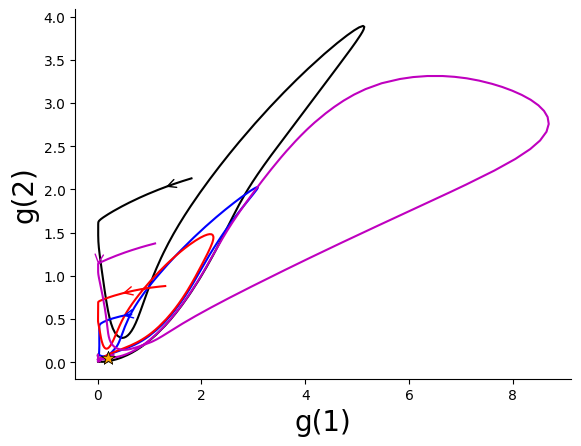

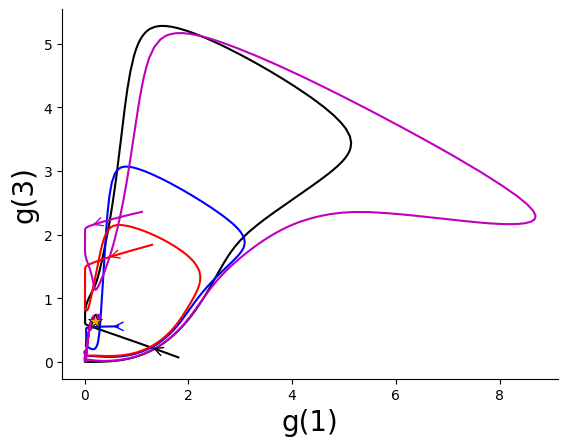

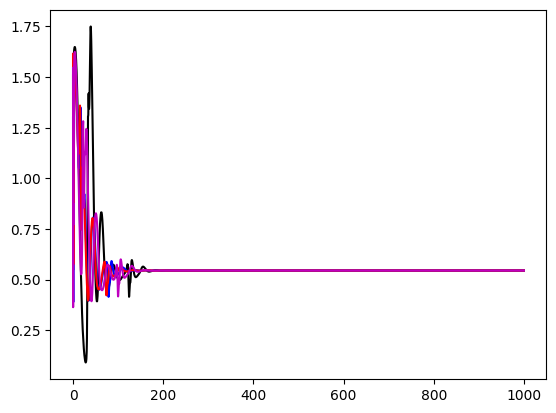

In [5]:
params = p.copy()
start_inds = [[50,50,50,50],#50,
              [50,50,50,50],#50,
              [10,3,10,30],#10,
              [10,2,10,15]] #10,
fig1, figN, fig_g2, fig_g3, fig_var = sim.make_traj_plots(
    params, t_f =1000, start_inds = start_inds, grp_size2 = 3, num_init = 4)

# Type 1

In [5]:
H = 0
x_max = 5
params_base = dict(η1 = 0.2, η2 = 0.5, A1 = 0.5, A2 = 0.5, 
                   β1 = 8, β2 = 1, H1a = 0, H2a = 0, H1b=H, H2b=H, 
                  α1_of_1=0.05, α2_of_1=0.95, 
                  s1=2, s2=2, α2_fun_type = 'constant',
                  x_max = x_max, d = 10,
                 Tx = .01, pop_process = True)

params = params_base.copy()

In [6]:
start_inds = [[50,50,50,50],#50,
              [50,50,50,50],#50,
              [10,3,10,30],#10,
              [10,2,10,15]] #10,
params['β1'] = 9


generating initial points


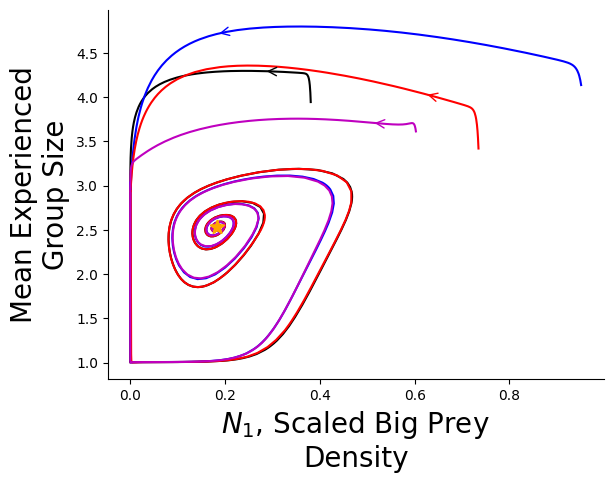

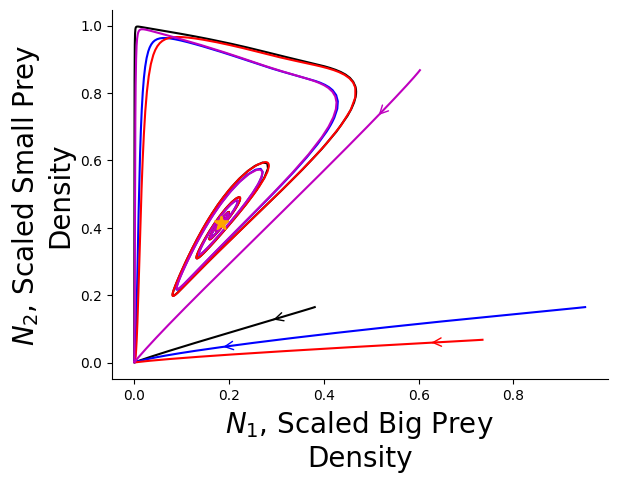

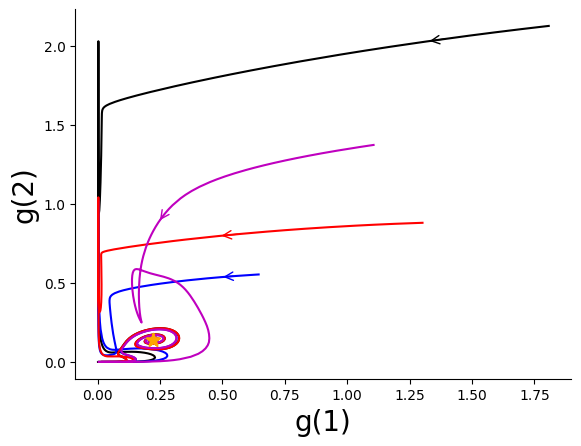

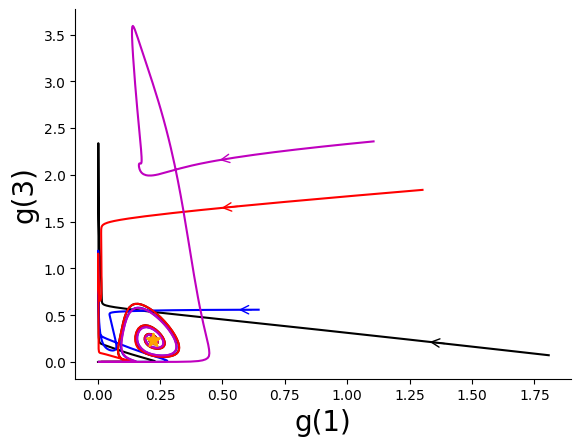

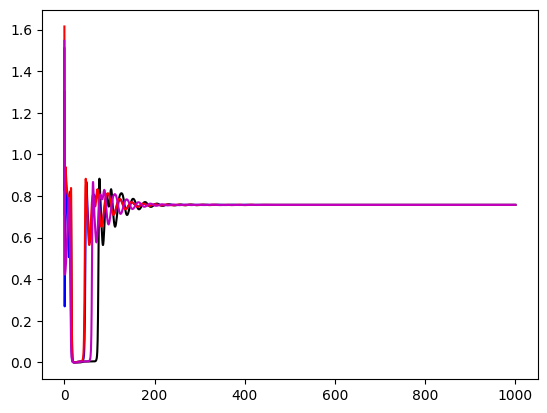

In [8]:

fig1, figN, fig_g2, fig_g3, fig_var = sim.make_traj_plots(
    params, t_f =1000, start_inds = start_inds, grp_size2 = 3, num_init = 4)

In [9]:
trajs = sim.get_traj_plot_input(params, t_f = 1000, initial_points = None, 
                        num_init=4)

generating initial points


In [9]:
figlist = [fig1, figN, fig_g2, fig_g3]
fn_base = '_type1_b1_9.eps'
for fig,fn in zip(figlist, fn_lab_list):
    fig.savefig(bif_sim_fig_path + fn + fn_base, **sim.figure_ops)

In [12]:
sim.colors_x

['k', 'b', 'r', 'm']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


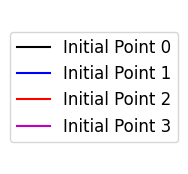

In [10]:
lines = []
for i in range(0,4):
    lines.append(plt.Line2D([0], [0], 
                            color=sim.colors_x[i], 
                            label='Initial Point %d'%i))

# Create a blank figure for the legend
fig, ax = plt.subplots(figsize=(2, 2))  # Adjust size as needed
ax.legend(handles=lines, loc='center', fontsize=12)
ax.axis('off')  
fig.savefig(bif_sim_fig_path + "legend_only.eps", **sim.figure_ops)